# Step 2: Importing libraries and datasets to use

In [1]:
# Import Pandas to manage the relational datasets
import pandas as pd

In [2]:
# Import Matplotlib to allow further customization of plots
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import Seaborn to provide attractive visualizations leveraging Matplotlib
import seaborn as sns

## Read in the Dataset

In [5]:
# Import the Pokemon dataset and set index position to column 0, or the first column
df = pd.read_csv('Pokemon.csv', index_col=0)

In [6]:
# Read the first 5 observations of the Dataset
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [9]:
# Read a description of the dataset
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


# Step 3: Using Seaborn's plotting functions

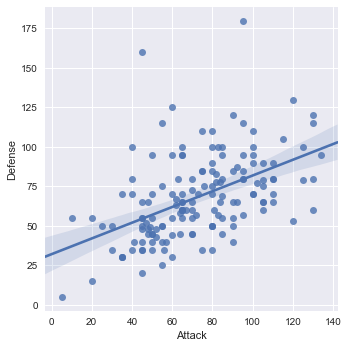

In [10]:
# Create the Default scatterplot
sns.lmplot(x='Attack', y='Defense', data=df)

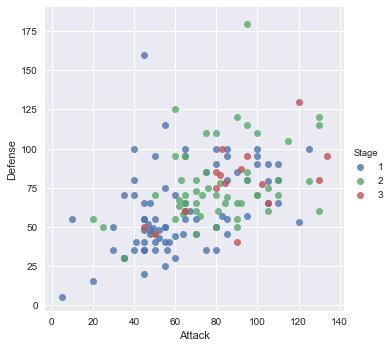

In [12]:
# Tweak the scatter plot to remove the regression line and adjust the observation colors by stage
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')